#### Вариант функции Б

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import math


def compute_function(x):
    return x * math.sin(2*math.pi*x)

1. Генерация выборки (для равномероного распределения) и отображение результатов

In [126]:
def uniform_sample_generation(values, num_samples, epsilon_0):

    # Генерация случайной ошибки измерения
    measurement_errors = np.random.uniform(-epsilon_0, epsilon_0, num_samples)

    # Генерация измерений с учетом ошибки
    measured_values = []
    for i in range(num_samples):
        measured_values.append(compute_function(values[i] + measurement_errors[i]))
    return measured_values

def show(values, measured_values):
    x = np.linspace(-1, 1, 500)
    y = []
    for i in range(500):
        y.append(compute_function(x[i]))

    # Визуализация результатов
    plt.plot(x, y, label = 'x * sin(2 * pi * x)', color = 'red')
    plt.scatter(values, measured_values, color = 'black')
    plt.title('Распределение измерений с ошибкой')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

2.1 Объем выборки 10

In [127]:
num_samples = 10
uniform_values_10 = np.random.uniform(-1, 1, num_samples)

 - $\varepsilon_0 = 0.5$

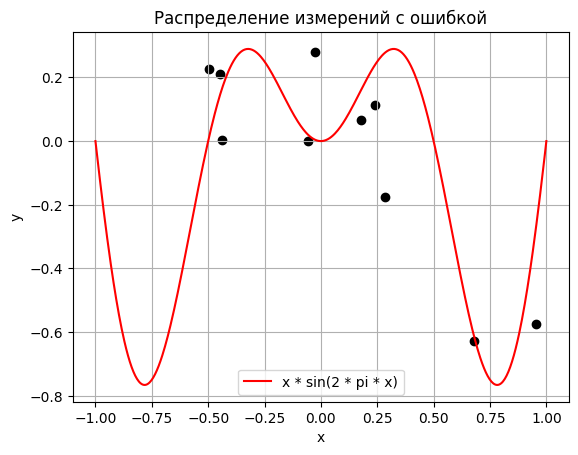

In [128]:
epsilon_0 = 0.5

results_10_05 = uniform_sample_generation(uniform_values_10, num_samples, epsilon_0)
show(uniform_values_10, results_10_05)


- $\varepsilon_0 = 1$

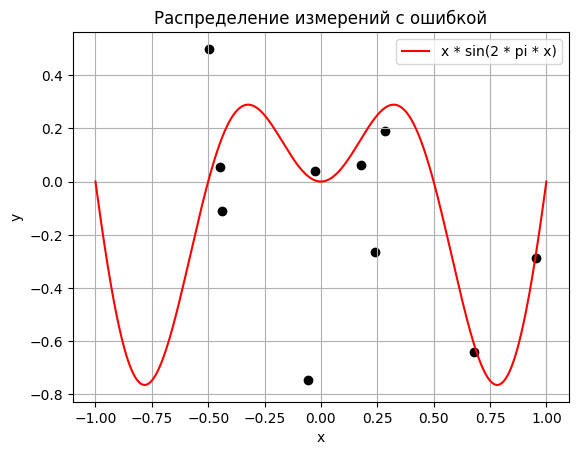

In [129]:
epsilon_0 = 1

results_10_1 = uniform_sample_generation(uniform_values_10, num_samples, epsilon_0)
show(uniform_values_10, results_10_1)

- $\varepsilon_0 = 2$

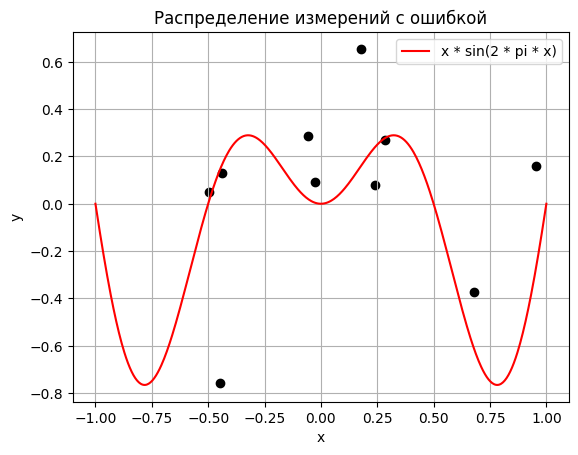

In [130]:
epsilon_0 = 2

results_10_2 = uniform_sample_generation(uniform_values_10, num_samples, epsilon_0)
show(uniform_values_10, results_10_2)

3. Генерация выборки (для нормального распределения) и отображение результатов

In [131]:
def normal_values_generation(left, right, num_values, mean, std):
    values = []
    while len(values) < num_values:
        x = np.random.normal(mean, std)
        if x >= left and x <= right:
            values.append(x)
    
    return np.array(values)

def normal_sample_generation(values, mean, std, num_samples):
    left = mean - 3 * std
    right = mean + 3 * std

    # Генерация случайной ошибки измерения
    measurement_errors = normal_values_generation(left, right, num_samples, mean, std)

    # Генерация измерений с учетом ошибки
    measured_values = []
    for i in range(num_samples):
        measured_values.append(compute_function(values[i] + measurement_errors[i]))
    
    return measured_values

3.1 Объём выборки 10

In [132]:
num_samples = 10
normal_values_10 = np.random.uniform(-1, 1, num_samples)

 - $\varphi = 0$, $\sigma = 0.5$

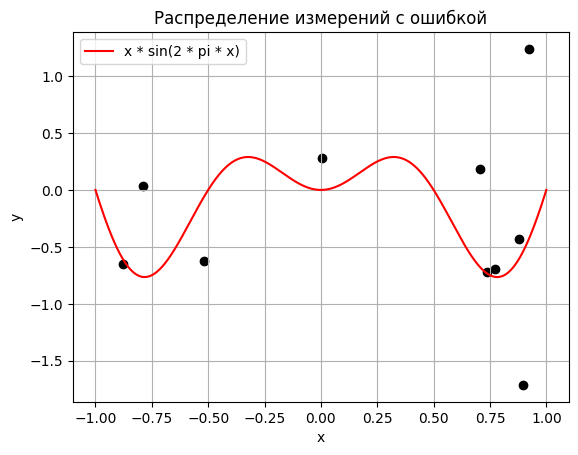

In [133]:
mean = 0
std = 0.5
nresults_10_05 = normal_sample_generation(normal_values_10, mean, std, num_samples)
show(normal_values_10, nresults_10_05)

 - $\varphi = 0$, $\sigma = 1$

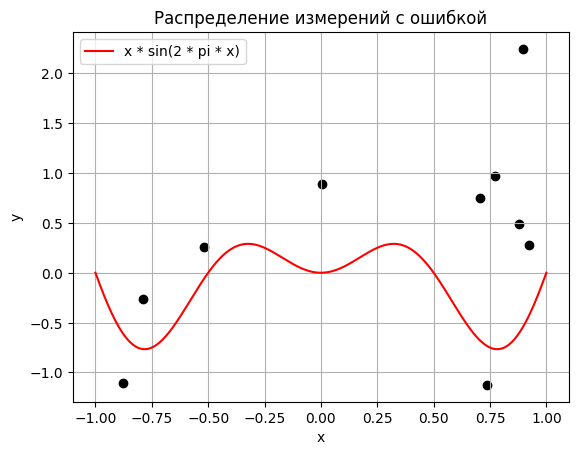

In [134]:
mean = 0
std = 1
nresults_10_1 = normal_sample_generation(normal_values_10, mean, std, num_samples)
show(normal_values_10, nresults_10_1)

 - $\varphi = 1$, $\sigma = 0.5$

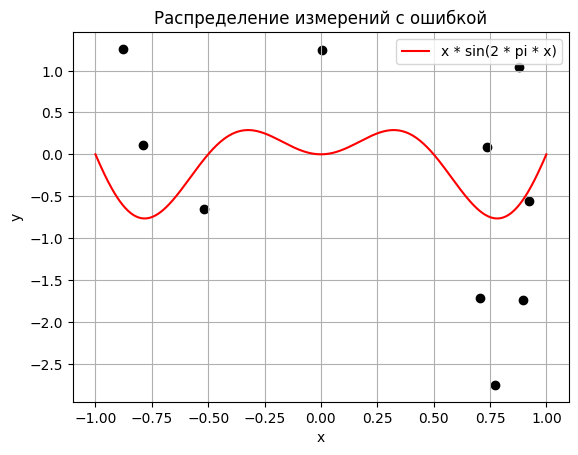

In [135]:
mean = 1
std = 0.5
nresults_10_05_10 = normal_sample_generation(normal_values_10, mean, std, num_samples)
show(normal_values_10, nresults_10_05_10)

3. Решение задачи полиномиальной регрессии

- Визуализация

In [136]:
def show_predict(x, y, p, x_study, y_study):
    # Визуализация результатов
    plt.scatter(x_study, y_study, color='green', label=f'Точки обучающей выборки')

    plt.plot(x, y, label = 'x * sin(2 * pi * x)', color = 'red')
    plt.plot(x, p(x), color='blue', label=f'Предсказанная функция')

    plt.title('Полиномиальная регрессия для имеющейся выборки')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

- Обучение для равномерно распределённой ошибки

In [185]:
num_samples = 100
epsilon_0 = 0.5

x_uniform_study = np.random.uniform(-1, 1, num_samples)
y_uniform_study = uniform_sample_generation(x_uniform_study, num_samples, epsilon_0)

degree = 5

p = np.poly1d(np.polyfit(x_uniform_study, y_uniform_study, degree))

По итогу получаем полином, по которому можно получать приближённые значения нашей функции.
Теперь используем его для её приближённого вычисления

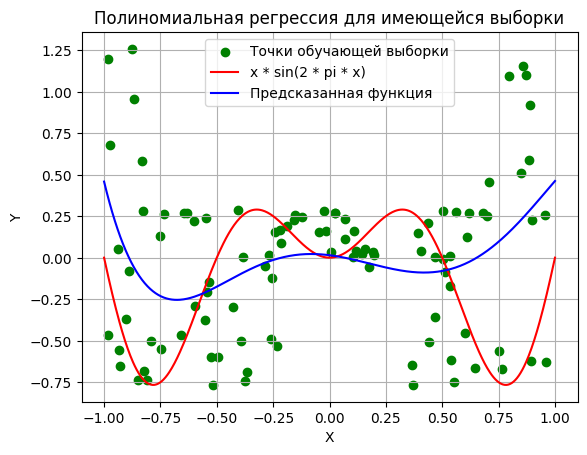

In [186]:
x = np.linspace(-1, 1, 500)
y = []
for i in x:
    y.append(compute_function(i))

y = np.array(y)

show_predict(x, y, p, x_uniform_study, y_uniform_study)

- Обучение для нормально распределённой ошибки

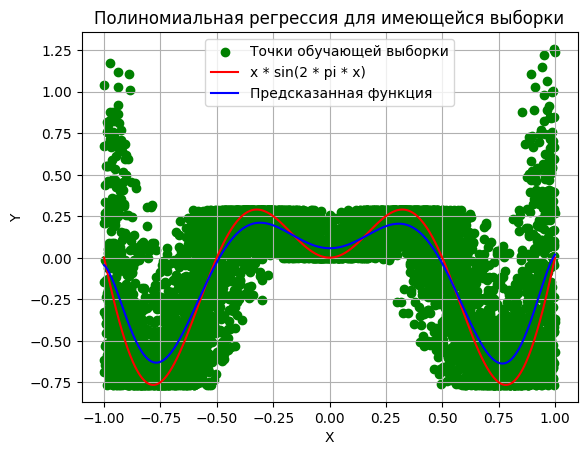

In [218]:
num_samples = 7000
mean = 0
std = 0.1


x_normal_study = np.random.uniform(-1, 1, num_samples)
y_normal_study = normal_sample_generation(x_normal_study, mean, std, num_samples)

degree = 8

p = np.poly1d(np.polyfit(x_normal_study, y_normal_study, degree))

x = np.linspace(-1, 1, 500)
y = []
for i in x:
    y.append(compute_function(i))

y = np.array(y)

show_predict(x, y, p, x_normal_study, y_normal_study)